## Import all usefull libarys 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
%matplotlib inline

Load the Data

In [2]:
df = pd.read_csv('train.csv',index_col=0)

In [3]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
X = df[['Age','Fare',"Pclass","Sex"]]
y = df['Survived']

In [102]:
X.shape,y.shape

((891, 3), (891,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=80)

In [9]:

X_train.isna().sum()

Age       136
Fare        0
Pclass      0
Sex         0
dtype: int64

In [18]:
numerical_columns =['Age','Fare',"Pclass"]
pipe = Pipeline([
    ("onehotenc",OneHotEncoder(),"Sex"),
    ('Age_Imputer', SimpleImputer(strategy='most_frequent'), ['Age']),
    ('scaler', MinMaxScaler(), numerical_columns)
])

ValueError: too many values to unpack (expected 2)

In [15]:
X_train

,Age,Fare,Pclass,Sex
PassengerId,,,,
796,39.0,13.0000,2,male
95,59.0,7.2500,3,male
760,33.0,86.5000,1,female
835,18.0,8.3000,3,male
114,20.0,9.8250,3,female
...,...,...,...,...
819,43.0,6.4500,3,male
523,NaN,7.2250,3,male
212,35.0,21.0000,2,female


In [105]:
ef = pd.concat([X,y],axis=1)

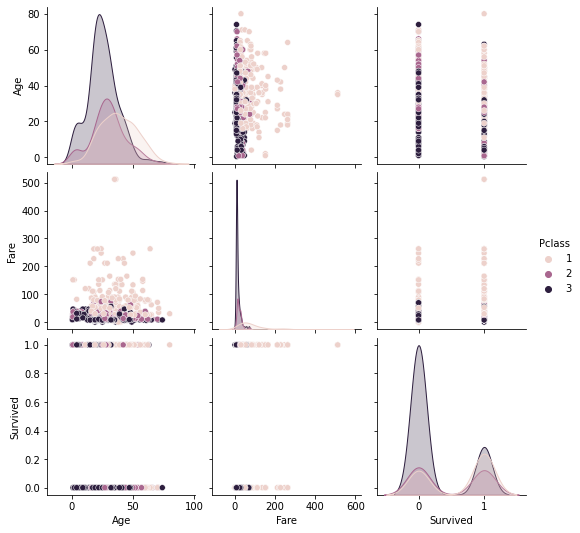

In [106]:
sns.pairplot(ef,hue='Pclass')

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
X_train = (X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_test.mean())/X_test.std()

In [119]:
y_train

PassengerId
796    0
95     0
760    1
835    0
114    0
      ..
819    0
523    0
212    1
189    0
176    0
Name: Survived, Length: 712, dtype: int64

In [116]:
m= LogisticRegression()

In [117]:
m.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

$$ y_1 $$